<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.403 · Programació per a la ciència de dades</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programació per a la ciència de dades
============================

---

Unitat 4: Optimització de codi: complexitat algorísmica i *profiling*
-----------------------------------------------------

---

### Instruccions d'ús

Aquest document és un *notebook* interactiu que combina explicacions més aviat teòriques de conceptes de programació i fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hàgiu llegit el contingut proporcionat, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants que us permetin comprovar que n'heu entès la funcionalitat i explorar-ne els detalls d'implementació. Finalment, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats.



Per guardar possibles modificacions que feu sobre aquest *notebook*, us aconsellem que munteu la unitat de Drive a Google Colaboratory (colab). Heu d'executar les instruccions següents:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/unit_4_pcd

/content/drive/MyDrive/Colab_Notebooks/unit_4_pcd


**Important**:

**Nota 1:** Aquest *notebook* conté fragments de codi que són lents d'executar i/o que consumeixen força memòria. Els valors d'entrada estan ajustats perquè el *notebook* pugui executar-se en pocs minuts en les màquines disponibles a Google colab. En cas que descarregueu el *notebook* i treballeu en algun altre entorn (màquina virtual o ordinador propi), és possible que  tingueu menys recursos. En aquest cas, el *notebook* pot trigar molt a executar-se o generar errors de manca de memòria. Si és així, simplement heu d'ajustar els valors d'entrada de les funcions de les cel·les que us generin problemes (per exemple, reduir la mida de les llistes d'entrada).

### Introducció

En aquesta unitat veurem com podem analitzar el nostre codi, tant des del punt de vista algorísmic com d'implementació, amb l'objectiu d'optimitzar-lo per fer-lo més eficient. Això ens permetrà dissenyar i implementar codi que sigui capaç de treballar amb grans conjunts de dades.

En primer lloc, posarem èmfasi en la distinció entre algorismes i implementacions, dos conceptes que fins ara no hem treballat de manera separada.

Seguidament, explicarem les nocions bàsiques per analitzar algorismes. Veurem com podem analitzar la complexitat temporal d'un algorisme i dues de les notacions més comunes per expressar-la.

Després ens centrarem en l'anàlisi d'implementacions fetes en Python, tot presentant algunes de les eines que es poden fer servir per analitzar el temps d'execució de codi Python.

A continuació, s'inclou la taula de continguts, que podeu fer servir per navegar pel document:

[Programació per a la ciència de dades](#scrollTo=LUH_bodiBYY6)

>[Unitat 4: Optimització de codi: complexitat algorísmica i profiling](#scrollTo=LUH_bodiBYY6)

>>[Instruccions d'ús](#scrollTo=LUH_bodiBYY6)

>>[Introducció](#scrollTo=pP97IqeYBYY-)

[Algorismes i implementacions](#scrollTo=bJabahCxBYZB)

[Anàlisi d'algorismes](#scrollTo=ZxEI1tKjBYZB)

>[2.1. Problemes computacionals i algorismes](#scrollTo=ZxEI1tKjBYZB)

>[2.2. Anàlisi d'algorismes](#scrollTo=p-e6Sy0LBYZI)

>>[2.2.1. Comptant passos](#scrollTo=p-e6Sy0LBYZI)

>>[2.2.2. Comportament asimptòtic](#scrollTo=m6aKg9jsBYZJ)

>>[2.2.3. Notacions i definicions formals](#scrollTo=066bVI-XBYZM)

>>>[Notació theta](#scrollTo=066bVI-XBYZM)

>>>[Notació O gran](#scrollTo=dpKL36Q8BYZP)

>>[2.2.4. Exemples addicionals](#scrollTo=b87oyxNQBYZR)

>[2.3. Conseqüències a nivell pràctic](#scrollTo=9k1_Ijl1BYZV)

[Anàlisi d'implementacions](#scrollTo=3EkAn9a8BYZY)

>[3.1. Profiling del temps d'execució d'un programa](#scrollTo=FJOgm1YzBYZZ)

>>[3.1.1. La instrucció màgica %time](#scrollTo=23n1l7XxBYZa)

>>[3.1.2. La instrucció màgica %timeit](#scrollTo=qp2nouqRBYZd)

>>[3.1.3. La instrucció màgica %lprun](#scrollTo=AeOFEZ7qBYZj)

>>[3.1.4. L'ús del profiling per optimitzar implementacions](#scrollTo=2PV50aIwBYZm)

>>>[Exemple 1: RSA](#scrollTo=2PV50aIwBYZm)

>>>[Exemple 2: Lectura manual de fitxers](#scrollTo=_JhCJq_3BYZs)

[Exercicis per practicar](#scrollTo=rW3NUGPTBYZ2)

>[4.1. Solucions dels exercicis per practicar](#scrollTo=duQ1pLB9BYZ8)

[Bibliografia](#scrollTo=4C1qQkn-BYaG)

>[5.1. Bibliografia bàsica](#scrollTo=4C1qQkn-BYaG)

>[5.2. Bibliografia addicional (ampliació de coneixements)](#scrollTo=4C1qQkn-BYaG)



# 1. Algorismes i implementacions

Abans d'endinsar-nos en el camp de l'avaluació dels algorismes, és important aturar-nos a pensar què és un algorisme. Fins ara, hem vist com podem solucionar diversos problemes computacionals fent servir el llenguatge de programació Python: són, doncs, aquests fragments de codi Python, que solucionen problemes, algorismes?

En aquesta assignatura hem optat per explicar algorísmica i programació (codificació en Python) alhora, tot explicant com podem solucionar diferents problemes computacionals, normalment centrats en la ciència de dades, en Python. Ara bé, cada vegada que plantejàvem com solucionar un problema donat en Python, la creació de les nostres solucions constava, en el fons, de dos passos diferenciats:

1. Dissenyar una possible solució al problema, és a dir, decidir quin conjunt de passos i en quin ordre cal fer-los per tal de solucionar el problema plantejat.

2. Implementar aquest conjunt de passos en Python, per tal de poder-los executar i proveir d'una solució a una instància concreta del problema plantejat.

Així, doncs, fins ara hem treballat implícitament en el disseny d'algorismes, sense posar èmfasi en el fet que un mateix algorisme pot ser implementat d'altres maneres, per exemple, fent servir algun altre llenguatge de programació o, fins i tot, sense cap llenguatge de programació (com ara directament com a circuit elèctric). En aquesta unitat, seguirem treballant en solucions implementades en Python, però les analitzarem, en primer lloc, des del punt de vista algorísmic i, en segon lloc, d'implementació. Així, en aquesta primera part d'aquesta unitat, ens centrarem a analitzar algorismes. Després, a la segona part de la unitat, veurem com podem analitzar una certa implementació d'un algorisme, en el nostre cas, en Python.

# 2. Anàlisi d'algorismes

## 2.1. Problemes computacionals i algorismes

Tornant a la pregunta que plantejàvem a l'inici de la unitat, podem definir un **algorisme** com un procediment computacional ben definit (no ambigu) que comprèn un conjunt de passos o instruccions computacionals. Un algorisme pren un valor (o un conjunt de valors) com a entrada i produeix un valor (o conjunt de valors) com a sortida. Un algorisme és, doncs, una eina per solucionar un **problema computacional**.

Alguns exemples de problemes computacionals que ja hem treballat poden ser trobar el valor màxim o mínim d'una seqüència de valors, ordenar una llista, eliminar els duplicats d'una llista o calcular l'àrea d'un cercle a partir del seu radi. Formalment, definim un problema computacional especificant la seva entrada i la seva sortida. Si agafem com a exemple el problema computacional de trobar el valor màxim d'una seqüència de valors numèrics, tindríem:

* Entrada: una seqüència de valors numèrics, $\{e_0, e_1, \cdots, e_{n-1}\}$
* Sortida: un únic valor numèric, $e_i$, tal que $e_i \ge e_j$ per qualsevol valor d'$i$ i $j \in [0, n)$.

Un algorisme per solucionar aquest problema computacional especifica, doncs, els passos que cal fer per convertir l'entrada (la seqüència $\{e_0, e_1, \cdots, e_{n-1}\}$) en la sortida (el valor $e_i$ amb les propietats especificades).

Direm que una entrada concreta és una **instància** del problema computacional. Per exemple, una instància del problema anterior correspondria a l'entrada  `[3, 1, 2, 4]`.

Per solucionar un mateix problema computacional hi poden haver algorismes diferents. Seguint amb l'exemple de trobar el valor màxim d'una seqüència, els següents dos algorismes (codificats aquí en Python) permetrien solucionar-lo:

In [ ]:
def max_alg_1(lst):
    """
    Return the maximum element on the list lst
    """
    max_element = lst[0]
    for e in lst:
        if e > max_element:
            max_element = e

    return max_element


def max_alg_2(lst):
    """
    Return the maximum element on the list lst
    """
    current_lst, max_pairs = lst, []
    while(len(current_lst) > 1):
        for i in range(0, len(current_lst), 2):
            if len(current_lst) - 1 == i:
                max_pairs.append(current_lst[i])
            elif current_lst[i] > current_lst[i+1]:
                max_pairs.append(current_lst[i])
            else:
                max_pairs.append(current_lst[i+1])

        current_lst, max_pairs = max_pairs, []

    return current_lst[0]

El primer algorisme inicialitza el valor màxim (`max_element`) al primer element de la llista i, després, recorre la llista una única vegada, comprovant per cada element de la llista si aquest és més gran que el valor màxim trobat fins aleshores. En cas que ho sigui, s'actualitza el valor màxim, que passa a prendre el valor de l'element processat.

El segon algorisme crea una nova llista (`max_pairs`) amb els valors màxims de cada parell d'elements de la llista d'entrada, de manera que aquesta nova llista tindrà la meitat dels elements que la primera. L'algorisme segueix fent aquest procediment, fins que la nova llista té un únic element, que correspon amb el màxim.

Podem comprovar com tots dos algorismes retornen el resultat correcte del problema computacional d'obtenir el màxim d'una seqüència per a la instància `[3, 1, 2, 4]`:

In [ ]:
print(max_alg_1([3, 1, 2, 4]))
print(max_alg_2([3, 1, 2, 4]))

4
4


Direm que un algorisme és **correcte** si aquest sempre obté la sortida correcta (és a dir, si la seva execució sempre finalitza amb la sortida adequada). En aquests casos, també podem dir que l'algorisme **soluciona** el problema computacional.

## 2.2. Anàlisi d'algorismes

Quan parlem d'analitzar algorismes ens referim a avaluar els **recursos** que necessitaran per executar-se. Recordeu que ara, en aquesta primera part de la unitat, parlem d'analitzar algorismes i no pas d'implementacions: estem interessats a avaluar la manera en què podem solucionar un problema, i no pas la seva implementació específica en Python. És evident que dues implementacions diferents del mateix algorisme poden tenir temps d'execució diferents, però d'això en parlarem a la segona part de la unitat.

Tot i que els recursos que pot consumir un algorisme són diversos (podem parlar, per exemple, de memòria RAM, d'amplada de banda de xarxa, etc.), quan analitzem algorismes ens acostumem a centrar en el **temps** de computació, el temps que tarden a calcular la sortida.

A més, ens interessarà especialment avaluar com es comporta l'algorisme quan la **mida de l'entrada** creix. La mesura que cal fer servir per quantificar la mida de l'entrada dependrà del problema computacional de què es tracti. Sovint, la mesura serà el nombre d'elements de l'entrada (com passa amb l'exemple del màxim, on la mida de l'entrada serà el nombre d'elements de la seqüència). Una altra mesura habitual és el nombre de bits necessaris per representar l'entrada (aquesta mesura es fa servir, per exemple, en problemes de factorització o tests de primalitat).

### 2.2.1. Comptant passos

I com podem analitzar el temps d'execució d'un algorisme?
Anem pas a pas i reprenem l'exemple anterior: procedirem a analitzar el temps d'execució de l'algorisme `max_alg_1`. Per fer-ho comptarem quants passos (quantes operacions primitives) cal fer per executar l'algorisme `max_alg_1` per a una entrada donada (per exemple, per a la llista `[3, 1, 2, 4]`), i assumirem que tots els passos tenen el mateix temps d'execució. Això no és del tot cert ja que hi ha operacions més costoses que d'altres, però com veurem ens permetrà tenir una idea del que tarda a executar-se l'algorisme.

Així, doncs, els passos que cal executar per l'algorisme implementat a la funció `max_alg_1` serien:

* Assignació del màxim inicial.
* Per cada element de la llista:
    * Recuperar l'element de la llista.
    * Comparar si l'element és major al màxim.
    * Si ho és, assignar-lo al màxim (`max_element`).
    
    
Per tant, per a l'entrada `[3, 1, 2, 4]`, el temps d'execució de l'algorisme seria:
$$ t_e = 1 + 2*4 + 1 = 10$$
és a dir, l'assignació inicial, repetir quatre vegades la recuperació de l'element i la comparació i, en una ocasió, actualitzar el màxim (quan es processa l'element `4` s'actualitza el màxim, ja que $4>3$).

Ara bé, hem dit que estàvem interessats a avaluar com es comportava l'algorisme quan la mida de l'entrada creixia. Què passaria, doncs, amb el temps d'execució de l'algorisme si la mida de la llista d'entrada creix? Quantes operacions caldria fer per a una llista de mida $n$?

Doncs bé, podem definir la funció $t_e(n)$ com la funció que retorna el temps d'execució depenent de la mida de l'entrada $n$. En el cas de l'algorisme `max_alg_1`, la funció seria:
$$t_e(n) = 1 + 2n + x,$$
on $x$ seria el nombre d'actualitzacions del valor màxim que calgués fer, nombre que dependria dels valors específics de la seqüència d'entrada. Així, doncs, no podem saber el nombre d'instruccions exacte que executaria l'algorisme, ja que aquest depèn de la instància que s'estigui solucionant.

Aquest fet és molt habitual quan analitzem algorismes: el temps d'execució de la majoria dels algorismes depèn dels valors específics d'entrada (i no només de la seva mida). Així, quan s'analitzen algorismes, s'acostuma a considerar el **cas pitjor** (en anglès, és el que es coneix com a *worst-case analysis*), de manera que comptem quantes instruccions necessitaria l'algorisme per executar-se si l'entrada és la més desfavorable possible.

Seguint amb l'exemple de l'algorisme `max_alg_1`, el nombre d'instruccions a executar en el pitjor cas seria:
$$t_w(n) = 1 + 2n + n = 1 + 3n$$
i correspondria a actualitzar el valor màxim per cadascun dels elements de l'entrada, cosa que passaria si la seqüència d'entrada estigués ordenada de manera creixent (per exemple, per a l'entrada `[1, 2, 3, 4]`).

Tot i que normalment farem servir aquesta mesura per avaluar els algorismes, a vegades també ens interessarà conèixer el temps d'execució en el **cas millor**, que correspondria al nombre d'instruccions que cal executar si l'entrada és la més favorable possible.

Per a l'algorisme `max_alg_1`, el temps d'execució en el cas millor seria:
$$t_b(n) = 1 + 2n$$
i correspondria a no actualitzar mai el valor del màxim, cosa que succeeix si el primer element de la llista és el major (per exemple, per a l'entrada `[4, 1, 2, 3]`).

Finalment, una tercera mètrica que es pot fer servir per avaluar el temps d'execució dels algorismes és el temps d'execució en el cas **mitjà**, que descriu la mitjana del temps d'execució de totes les possibles entrades. Tanmateix, aquesta mètrica es fa servir poc sovint, ja que calcular-la acostuma a ser costós: per fer-ho, hem de saber la distribució de probabilitat de les entrades de l'algorisme, i hem de tenir en compte el nombre de passos que cal fer per cadascuna de les possibles entrades.

A partir d'aquest moment, quan parlem del temps d'execució d'un algorisme, ens referirem al temps en el cas pitjor (a no ser que diguem explícitament el contrari), de manera que considerarem que:
$$t(n) = t_w(n).$$

### 2.2.2. Comportament asimptòtic

Conèixer la funció $t(n)$ ens permet tenir informació sobre com de ràpid és l'algorisme. Ara bé, com hem dit, estem interessats a conèixer com es comporten els algorismes quan la mida de l'entrada creix molt, és a dir, volem saber l'**ordre de creixement** del temps d'execució de l'algorisme.

Si ens fixem en la funció $t(n)$, podem veure que està formada per dos termes: $1$ i $3n$. Aleshores, si observem el comportament de la funció quan $n$ creix molt (és a dir, si observem el **comportament asimptòtic** de la funció), el primer terme és del tot menyspreable, ja que el segon terme té molt més pes. D'aquesta manera, podem simplificar l'expressió del temps d'execució de l'algorisme mantenint únicament el terme de més pes, $3n.$

Addicionalment, i seguint el mateix raonament de centrar-nos en el comportament de la funció quan la mida de l'entrada creix, podem simplificar encara més l'expressió i eliminar el factor $3$ que precedeix a $n$, de manera que l'expressió del temps d'execució quedaria com a únicament $n$.

Fent servir la notació estàndard per definir la complexitat d'un algorisme, farem servir la vuitena lletra de l'alfabet grec, theta, per descriure el temps d'execució en el cas pitjor d'un algorisme, i direm doncs que l'algorisme `max_alg_1` té un temps d'execució en el pitjor cas de $\Theta(n)$, i també que $1+3n \in \Theta(n)$.

Veiem ara, en primer lloc, de manera informal, per què podem fer aquest procés de seleccionar únicament el terme de creixement més ràpid i eliminar-ne els coeficients en l'anàlisi dels temps d'execució dels algorismes. Per intentar visualitzar-ho gràficament, mostrarem una gràfica del creixement de diverses funcions:

In [ ]:
%matplotlib inline

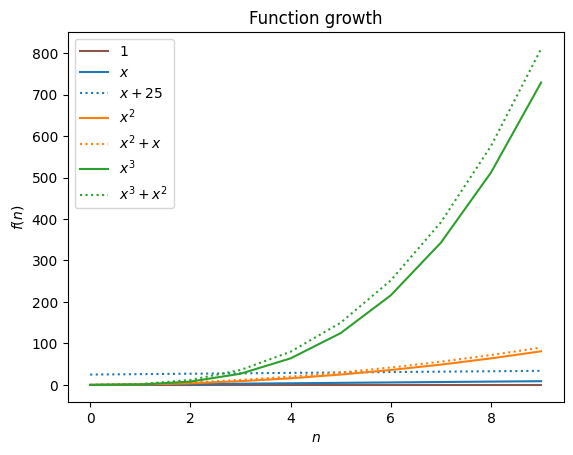

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_funs(xs):
    """
    Plot a set of predefined functions for the x values in 'xs'.
    """
    ys0 = [1 for x in xs]
    ys1 = [x for x in xs]
    ys1_b = [x + 25 for x in xs]
    ys2 = [x**2 for x in xs]
    ys2_b = [x**2 + x for x in xs]
    ys3 = [x**3 for x in xs]
    ys3_b = [x**3 + x**2 for x in xs]

    fig = plt.figure()
    plt.plot(xs, ys0, '-', color='tab:brown')
    plt.plot(xs, ys1, '-', color='tab:blue')
    plt.plot(xs, ys1_b, ':', color='tab:blue')
    plt.plot(xs, ys2, '-', color='tab:orange')
    plt.plot(xs, ys2_b, ':', color='tab:orange')
    plt.plot(xs, ys3, '-', color='tab:green')
    plt.plot(xs, ys3_b, ':', color='tab:green')

    plt.legend(["$1$", "$x$", "$x+25$", "$x^2$", "$x^2+x$", "$x^3$",
                "$x^3+x^2$"])

    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')
    plt.show()


plot_funs(range(10))

Les línies d'un mateix color representen funcions que tenen el mateix grau. Així, la línia marró que gairebé no s'aprecia mostra una funció constant ($f(n)=1$), les línies de color blau mostren funcions lineals ($x$ i $x+25$), les línies de color taronja funcions quadràtiques ($x^2$ i $x^2+x$), i les línies de color verd funcions cúbiques ($x^3$ i $x^3+x^2$). Per a cada color, la línia contínua (sòlida) representa la funció que conté només el terme de major grau i la línia de punts és una funció que té també altres termes de menor grau. Com es pot apreciar, el creixement de les funcions amb el mateix grau és similar, sobretot quan creix el valor d'$n$. Fixeu-vos en la representació de les mateixes funcions si augmentem el valor d'$n$ de 10 (gràfica anterior) a 100 (gràfica de la cel·la següent):

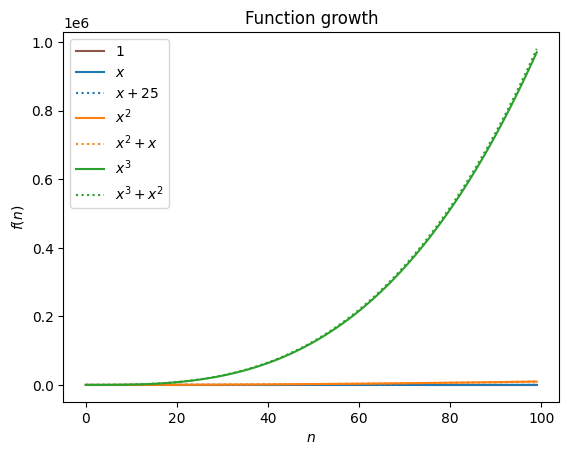

In [ ]:
plot_funs(range(100))

És a dir, de manera informal, direm que el temps d'execució en el pitjor cas d'un algorisme és de l'ordre del terme de major grau de la funció $t(n)$, ja que el creixement d'aquesta funció quan $n$ es fa molt gran és molt similar a la de funcions que tenen altres termes de menor grau.

### 2.2.3. Notacions i definicions formals

#### Notació theta

Veiem ara, en segon lloc, de manera formal, la definició de $\Theta$, i el motiu pel qual podem dir que $1+3n \in \Theta(n)$.

Donada una funció $g(n)$, denotem amb $\Theta(g(n))$ el conjunt de funcions següent:

$$\Theta(g(n)) = \{ f(n) :
    \exists c_1, c_2 \text{ i } n_0 > 0
    \text{ tals que  }
    0 \leq c_1g(n) \leq f(n) \leq c_2g(n),
    \forall n \ge n_0 \}$$

És a dir, $\Theta(g(n))$ és el conjunt de funcions per als quals existeixen constants positives $c_1$ i $c_2$ tals que la funció es troba *enmig* de $c_1g(n)$ i $c_2g(n)$ per a valors $n$ grans (valors d'$n$ superiors a $n_0$).

Així, efectivament, $1+3n \in \Theta(n)$, ja que, per exemple, per a $c_1=2$ i $c_2=4$, $n_0=1$, es compleixen les condicions de la definició anterior. Vegem-ho gràficament:

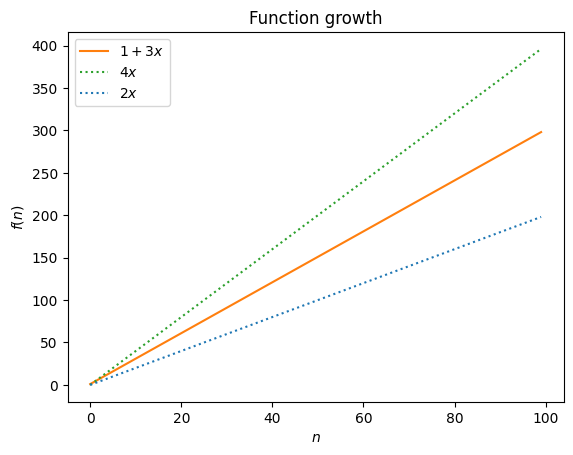

In [ ]:
def plot_funs_theta(xs, n_val=False, sup_only=False):
    """
    Plot the function 1+3x together with a lower bound (2x) and an
    upper bound (4x).
    """
    legend, c1, c2, n0 = [], 2, 4, 1

    ys_f, leg_f = [1 + 3*x for x in xs], "$1+3x$"
    ys_low, leg_low = [c1*x for x in xs], "$2x$"
    ys_high, leg_high = [c2*x for x in xs], "$4x$"

    fig = plt.figure()

    plt.plot(xs, ys_f, '-', color='tab:orange')
    legend.append(leg_f)
    plt.plot(xs, ys_high, ':', color='tab:green')
    legend.append(leg_high)

    if not sup_only:
        plt.plot(xs, ys_low, ':', color='tab:blue')
        legend.append(leg_low)

    if n_val:
        plt.plot([n0, n0], [0, max(ys_high)], '--', color='tab:gray')

    plt.legend(legend)
    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')
    plt.show()


plot_funs_theta(range(100))

Efectivament, la funció $1+3x$ es troba *enmig* de les funcions $2x$ i $4x$ per a valors d'$n$ *grans*. Què passa, però, amb el valor $n_0$ a partir del qual això és cert? Per què és necessari incloure aquest valor $n_0$ a l'expressió? Si ens fixem en el comportament de la funció per a valors petits, ho veurem clarament:

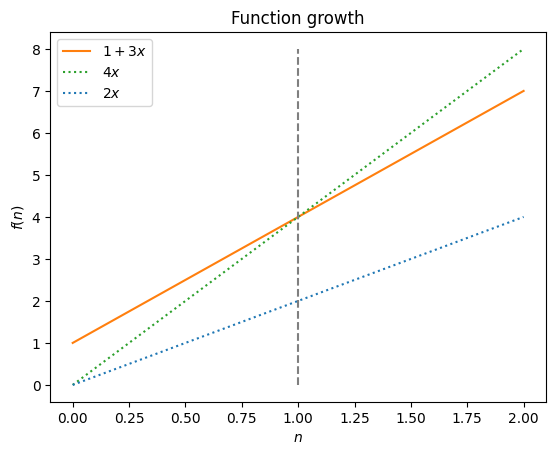

In [ ]:
plot_funs_theta(range(3), True)

En el cas de la funció $1+3x$, la funció es troba per sobre tant de $2x$ com de $4x$ per a valors menors a 1 (que és el terme independent d'$1+3x$). És per això que a la definició considerem el paràmetre $n_0$ a partir del qual la funció es troba, efectivament, *enmig* de $c_1g(n)$ i $c_2g(n)$.

Cal tenir en compte, també, que els valors de les constants no són únics, que, per tant, hi hauria altres valors de constants $c_1$, $c_2$ i $n_0$ pels quals la condició $c_1g(n) \leq f(n) \leq c_2g(n)$ també es compliria. Els valors de les constants no són importants i el que ens interessa és saber si n'existeixen algunes per les quals es compleix la condició.

Considerant la complexitat d'un algorisme a partir del creixement del seu temps d'execució, es fan servir els següents termes per descriure els algorismes:
* $\Theta{(1)}$: algorisme de temps constant
* $\Theta{(log(n))}$: algorisme logarítmic
* $\Theta{(n)}$: algorisme lineal
* $\Theta{(n*log(n))}$: algorisme quasi-lineal
* $\Theta{(n^2)}$: algorisme quadràtic
* $\Theta{(n^a)}$: algorisme multinomial (a>2)
* $\Theta{(e^n)}$: algorisme exponencial
* $\Theta{(n!)}$: algorisme amb complexitat factorial



#### Notació O gran

Com hem vist, la complexitat d'un algorisme expressada a partir de $\Theta$ ens dona uns llindars asimptòtics "estrets" per a la funció del temps d'execució de l'algorisme, $t(n)$, informant tant del límit inferior com del superior de la mateixa. Quan només en coneixem el límit superior, farem servir la notació d'O gran (que descriurem amb el símbol $\mathcal{O}$).

Donada una funció $g(n)$, denotem amb $\mathcal{O}(g(n))$ el conjunt de funcions següent:

$$\mathcal{O}(g(n)) = \{ f(n) :
    \exists c_2 \text{ i } n_0 > 0
    \text{ tals que  }
    0 \leq f(n) \leq c_2g(n),
    \forall n \ge n_0 \}$$

Si ens fixem en la definició d'$\mathcal{O}$, podem observar que és similar a la definició que havíem fet de $\Theta$, però, en aquest cas, només limitem la funció per sobre (hem reduït les restriccions pel que fa als valors mínims de la funció). Si ho volem visualitzar gràficament com hem fet anteriorment i seguint amb el mateix exemple, tindríem que $1+3n \in \mathcal{O}(n)$, ja que, per exemple, per a $c_2=4$, $n_0=1$, es compleixen les condicions de la definició anterior:

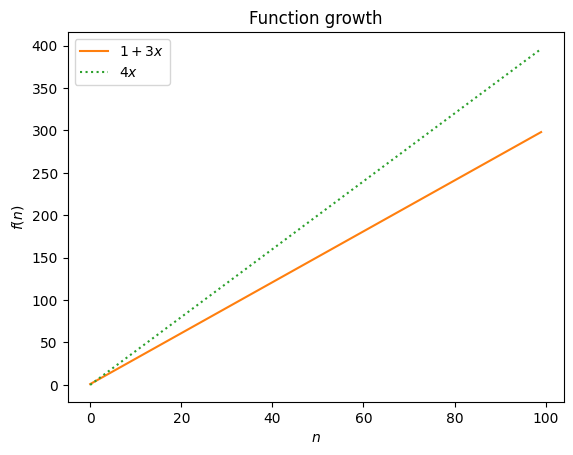

In [ ]:
plot_funs_theta(range(100), False, True)

Tenint en compte aquesta definició, podem dir que $\Theta(g(n)) \subseteq \mathcal{O}(g(n))$, ja que, efectivament, totes les funcions $f(n)$ que estiguin dins del conjunt $\Theta(g(n))$ també estaran dins del conjunt $\mathcal{O}(g(n))$. Ara bé, la implicació contrària no és certa. Seguint amb l'exemple que hem estat veient, tindríem que $1+3n \in \mathcal{O}(n)$ i també $1+3n \in \Theta(n)$; però, en canvi $1+3n \in \mathcal{O}(n^2)$ però $1+3n \notin \Theta(n^2)$. En efecte, $1+3n \notin \Theta(n^2)$, ja que no hi ha cap valor $c_1$ tal que $c_1n^2 \leq 1+3n$ per tot $n \ge n_0$.

Fer servir $\mathcal{O}$ per a quantificar la complexitat temporal d'un algorisme ens permet calcular aquesta complexitat de manera més senzilla que com ho hem fet fins ara: no és necessari comptar minuciosament les instruccions que caldria executar per obtenir $t(n)$ i després extreure el terme de major grau, sinó que podem deduir-ne la complexitat observant l'estructura del codi (el seu flux d'execució). En general, la complexitat $\mathcal{O}$ d'un programa vindrà determinada pels bucles que tingui i per com estiguin distribuïts.

Així, doncs, si revisitem l'algorisme `max_alg_1`, podem veure que aquest té un únic bucle, que itera per tots els elements de la seqüència d'entrada. Així, efectivament, l'algorisme `max_alg_1` té una complexitat d'$\mathcal{O}(n)$.



### 2.2.4. Exemples addicionals

Per acabar d'entendre els conceptes que hem explicat en aquesta unitat, ara veurem un parell d'exemples més d'anàlisi d'algorismes:

**Exemple 1**

L'algorisme `hypotenuse` calcula la mida de la hipotenusa d'un triangle a partir de les mides dels seus costats.

In [ ]:
import math


def hypotenuse(a, b):
    """
    Compute the length of the hypotenuse of a triangle
    of legs 'a' and 'b'.
    """
    a_sq = a**2
    b_sq = b**2
    c_sq = a_sq + b_sq
    c = math.sqrt(c_sq)
    return c

In [ ]:
c = hypotenuse(15, 16)
print("The hypot. of a triang. with legs 15 and 16 is:\t{}".format(c))

The hypot. of a triang. with legs 15 and 16 is:	21.93171219946131


Si ens fixem en el codi d'aquest algorisme, podem veure que consta d'un seguit de passos que s'executen un darrere de l'altre, sense incloure cap instrucció que alteri el flux d'execució del codi. Per tant, podem dir que l'algorisme té un temps d'execució constant:
$$t(n) \in \mathcal{O}(1)$$

En efecte, si procedíssim, com ho hem fet la primera vegada, a comptar minuciosament les instruccions que conformen el codi, veuríem que per a qualsevol valor d'entrada el codi executaria sempre:
* Dues potències
* Una suma
* Una arrel quadrada

De manera que tindríem que el nombre d'instruccions seria sempre $4$ (és a dir, $t(n)=4$), i si ens quedem amb el terme de major grau i n'eliminem el coeficient, tenim que $t(n) \in \mathcal{O}(1)$.


**Exemple 2**

L'algorisme `words_in_a_not_in_b` retorna una llista de totes les paraules que hi ha a la llista que rep com a primer paràmetre que no es troben també a la llista que rep com a segon paràmetre.

In [ ]:
def words_in_a_not_in_b(a, b):
    """
    Return the words in the list 'a' that are not present
    in the list 'b'.
    """
    result = []
    for word_a in a:
        found = False
        for word_b in b:
            if word_a == word_b:
                found = True
        if not found:
            result.append(word_a)

    return result

In [ ]:
words_1 = ["The", "Magic", "Words", "are", "Squeamish", "Ossifrage"]
words_2 = ["Martin", "Gardner", "Mathematical", "Games", "column", "Words",
           "are", "powerful"]
r = words_in_a_not_in_b(words_1, words_2)
print("Words in words_1 but not in words_2:\t\t{}".format(r))

Words in words_1 but not in words_2:		['The', 'Magic', 'Squeamish', 'Ossifrage']


En aquest cas, observant l'algorisme, podem veure que té un bucle extern que itera pels elements de la primera llista, i un segon bucle dins d'aquest primer, que itera pels elements de la segona llista. Per tant, si considerem que els dos paràmetres que rep l'algorisme creixen de manera similar, aleshores el temps d'execució de l'algorisme compliria que:
$$t(n) \in \mathcal{O}(n^2)$$

ja que en el pitjor dels casos s'executaran $n$ vegades les instruccions de dins del bucle extern i, per cada una d'aquestes vegades, s'executarà $n$ vegades el bucle intern.

De nou, procedim a comptar les instruccions individualment, per comprovar el resultat. En aquest cas, l'algorisme executaria:
* Una assignació
* Per cada element de la llista `a`:
    * Recuperar l'element
    * Una assignació
    * Per cada element de la llista `b`:
        * Recuperar l'element
        * Fer una comparació
        * Fer una assignació (`found = True`)
    * Fer una comparació
    * Afegir un element a la llista (`result.append(word_a)`)
    
Fixeu-vos que estem considerant el pitjor dels casos, ja que assumim que l'assignació de dins del bucle intern (`found = True`) i la instrucció d'afegir un element a la llista amb el resultat (`result.append(word_a)`) s'estan executant sempre, i això no seria cert per a tots els valors d'entrada. Quantes instruccions executaria, doncs, l'algorisme per a una entrada de mida $n$ (assumint que les dues llistes tenen la mateixa mida $n$)? En aquest cas, tindríem:
$$t(n) = 1 + n(2 + 3n + 2) = 1 + n(4+3n) = 1 + 4n + 3n^2$$
i si ens quedem només amb el terme de creixement més ràpid podem dir que:
$$t(n) \in \mathcal{O}(n^2)$$
tal com ja havíem deduït observant el flux d'execució inicialment.

## 2.3. Conseqüències a nivell pràctic

En aquest punt ens podríem plantejar per què és important avaluar la complexitat algorísmica dels algorismes que implementem. Doncs bé, més enllà dels conceptes teòrics, conèixer la complexitat dels algorismes ens permet saber com es comportaran quan hàgim de treballar amb conjunts de dades grans i, addicionalment, ens permet comparar diversos algorismes per seleccionar-ne el més eficient. Sovint, quan treballem amb conjunts de dades petits, no ens caldrà fixar-nos en la complexitat dels algorismes que dissenyem, ja que podrem executar-los sense cap problema. Ara bé, quan dissenyem algorismes per tractar amb conjunts grans de dades, haurem de tenir molta cura i intentar fer-los el més eficients possible, ja que sinó aquests tardaran molt a executar-se o, fins i tot, podran fer que no sigui possible obtenir solucions per als nostres problemes.

En aquesta primera part de la unitat ens hem centrat a avaluar algorismes i no pas implementacions. Tot i així, a tall d'exemple, veurem les conseqüències de tenir implementacions d'algorismes amb diferents graus de complexitat. En concret, veurem un exemple de les llibreries oficials de Python, analitzant com es comporten els algorismes que implementen els tests de pertinença en *conjunts* i en *llistes* en Python. Per fer-ho implementem una funció que genera una seqüència aleatòria d'enters no repetits de mida $n$ que rep com a paràmetre, i comprova si hi ha un element concret (per defecte, el valor `0`) a dins d'aquesta seqüència. En primer lloc, tractarem la seqüència com a *conjunt*, i calcularem el temps que es tarda a buscar l'element al conjunt. En segon lloc, tractarem la seqüència com a *llista*, i repetirem el mateix procés. Per tal d'analitzar sempre el cas pitjor, buscarem un element que no hi és mai a la seqüència:

In [ ]:
import numpy as np
import time


def test_membership(n, element=0):
    rand_array = np.random.randint(low=1, high=2147483647, size=n)
    rand_set = set(rand_array)
    rand_list = list(rand_set)

    start_time = time.time()
    element in rand_set
    middle_time = time.time()
    element in rand_list
    stop_time = time.time()

    set_time = middle_time - start_time
    list_time = stop_time - middle_time
    print("\tMembership test in set:\t\t{} seconds".format(set_time))
    print("\tMembership test in list:\t{} seconds".format(list_time))

    return set_time, list_time

Ara, executarem la funció anterior per diferents valors d'*n* i veurem com evoluciona el temps d'execució:

n = 1
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	7.152557373046875e-07 seconds
n = 10
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	1.430511474609375e-06 seconds
n = 100
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	4.76837158203125e-06 seconds
n = 1000
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	4.696846008300781e-05 seconds
n = 10000
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	0.0003037452697753906 seconds
n = 100000
	Membership test in set:		1.1920928955078125e-06 seconds
	Membership test in list:	0.013134241104125977 seconds
n = 1000000
	Membership test in set:		1.6689300537109375e-06 seconds
	Membership test in list:	0.15220117568969727 seconds
n = 10000000
	Membership test in set:		1.1920928955078125e-06 seconds
	Membership test in list:	1.0862712860107422 seconds


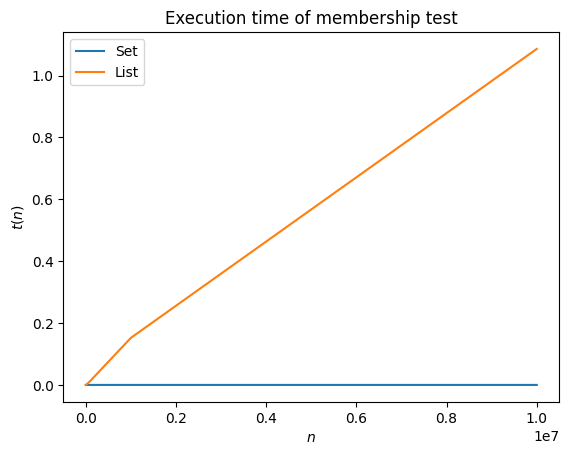

In [ ]:
# Podeu ajustar els valors de xs en funció de la memòria disponible a la
# màquina on executeu aquest codi. Proveu d'afegir números més grans si
# la màquina té prou memòria o d'eliminar els últims valors de la llista
# si l'execució d'aquest codi genera alguna excepció per falta de memòria.
xs = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
ys_set, ys_list = [], []
for x in xs:
    print("n = {}".format(x))
    s, li = test_membership(x)
    ys_set.append(s)
    ys_list.append(li)

plt.figure()
plt.plot(xs, ys_set, xs, ys_list)
plt.legend(["Set", "List"])
plt.xlabel('$n$')
plt.ylabel('$t(n)$')
plt.title("Execution time of membership test")
plt.show()

Doncs bé, més enllà de possibles detalls d'implementació que puguin afectar aquest temps, el que estem veient és la conseqüència que la complexitat de l'algorisme que implementa Python per comparar si un element pertany a un conjunt és $\mathcal{O}(1)$, mentre que la complexitat de l'algorisme implementat per a les llistes és $\mathcal{O}(n)$. Així, per a valors petits d'$n$, els dos algorismes tenen un temps d'execució similar; però a mesura que el valor d'$n$ creix, l'algorisme sobre el conjunt és molt més ràpid que el que actua sobre la llista. Les diferències són ja molt notables per a llistes d'un milió d'elements i l'algorisme sobre llistes té només una complexitat lineal (imagineu què passaria si aquest fos quadràtic o, fins i tot, exponencial)!

# 3. Anàlisi d'implementacions



L'apartat anterior explica com es pot calcular la complexitat del temps d'execució d'un algorisme. Ara bé, una vegada hem decidit l'algorisme que farem servir per solucionar el problema que volem afrontar, l'haurem d'implementar (per tal de poder-lo fer servir per a resoldre instàncies del problema). En aquest apartat, veurem com podem analitzar implementacions d'algorismes fetes en Python.

Mentre que a l'apartat anterior hem obviat el temps d'execució de les instruccions individuals que conformaven un algorisme (recordeu, quan comptàvem instruccions, que totes eren considerades com a equivalents), el cert és que no totes les instruccions tarden el mateix a executar-se. Aquest temps, però, depèn de la implementació, de manera que no té sentit incorporar-lo quan parlem de complexitat de l'algorisme. Ara, que avaluarem les implementacions, sí que considerarem aquest temps.

Anomenem anàlisi del rendiment del codi (en anglès, **_profiling_**) a l'anàlisi del comportament d'un programa, mesurant-ne per exemple el temps d'execució o l'espai de memòria necessari per executar-lo.

Ja coneixem algunes alternatives per analitzar les implementacions en Python. Per exemple, a l'últim apartat de la secció anterior hem vist una manera molt rudimentària de fer *profiling* de codi Python, calculant el temps d'execució de la instrucció `element in rand_set` (o `rand_list`) amb la llibreria `time`, tot restant el temps actual just abans d'executar la instrucció del temps actual just després d'executar la instrucció. Ara bé, com us podeu imaginar, aquesta alternativa pot ser útil per comprovar quant tarda a executar-se un fragment de codi, però serà del tot inadequada si volem instrumentar tot un programa sencer.

També en unitats anteriors hem vist com podem saber quant ocupa una variable en memòria en Python fent servir la funció `getsizeof` del mòdul `sys`.

In [ ]:
from sys import getsizeof
a = 42
# Mostrem l'espai (en bytes) de la variable a
getsizeof(a)

28

De nou, aquesta estratègia pot servir per saber quant ocupa una variable concreta, però és poc pràctica per avaluar programes sencers.

En les seccions següents veurem algunes alternatives per analitzar implementacions en Python basades en l'ús d'instruccions màgiques dels *notebooks*.

## 3.1. Profiling del temps d'execució d'un programa

### 3.1.1. La instrucció màgica `%time`

Una alternativa que ens permet calcular el temps d'execució d'una funció és la instrucció màgica `%time`, que mostra el temps total d'execució d'una línia de codi. En concret, `%time` mostra
* Temps de rellotge de paret (`Wall time`): és el temps total des de l'inici de l'execució de la funció fins al final de l'execució d'aquesta, tal com el mesuraria un rellotge de paret o un cronòmetre extern.
* Temps de CPU: temps de processament de la funció, és la quantitat de temps que la CPU ha fet servir per processar les instruccions de la funció. Aquest temps es troba dividit en temps d'usuari (`user`) i de sistema (`sys`), depenent de si s'estan executant instruccions en mode d'usuari o de kernel.

Vegem-ne alguns exemples:

In [ ]:
%time sum(np.random.randint(low=1, high=2147483647, size=1000))

CPU times: user 193 µs, sys: 27 µs, total: 220 µs
Wall time: 214 µs


1055766099161

In [ ]:
%time hypotenuse(15, 16)

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 12.2 µs


21.93171219946131

In [ ]:
rand_list = np.random.randint(low=1, high=2147483647, size=10)
%time max_alg_1(rand_list)

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 19.6 µs


2095163914

In [ ]:
rand_list = np.random.randint(low=1, high=2147483647, size=10000)
%time max_alg_1(rand_list)

CPU times: user 314 µs, sys: 1.05 ms, total: 1.36 ms
Wall time: 1.39 ms


2147444544

Fixeu-vos que `%time` pot fer-se servir per avaluar el temps d'execució d'una única línia de codi, que pot ser una crida a una funció, una avaluació d'una expressió, etc.

També podem fer servir `%time` per comparar el temps d'execució del test de pertinença sobre llistes i conjunts, com fèiem a la secció anterior:

In [ ]:
n = 10000000
rand_array = np.random.randint(low=1, high=2147483647, size=n)
rand_set = set(rand_array)
rand_list = list(rand_set)

%time 5 in rand_set
%time 5 in rand_list

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 1.05 s, sys: 1.44 ms, total: 1.05 s
Wall time: 1.04 s


False

### 3.1.2. La instrucció màgica `%timeit`

La comanda màgica `%time` executa la instrucció que s'ha de mesurar una única vegada i en retorna el seu temps d'execució. En canvi, la variant `%timeit` executa la instrucció múltiples vegades i mostra el temps d'execució mitjà de les diverses execucions i la desviació típica.

In [ ]:
%timeit sum(np.random.randint(low=1, high=2147483647, size=1000))

106 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit hypotenuse(15, 16)

640 ns ± 9.55 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
rand_list = np.random.randint(low=1, high=2147483647, size=10)
%timeit max_alg_1(rand_list)

1.41 µs ± 47.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
rand_list = np.random.randint(low=1, high=2147483647, size=10000)
%timeit max_alg_1(rand_list)

869 µs ± 201 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Fixeu-vos que, en general, els temps obtinguts amb `%timeit` són inferiors als que s'obtenen amb `%time`. Això es deu al fet que `%timeit` intenta minimitzar les interferències mentre s'està fent la mesura, per tal d'oferir únicament el temps d'execució de la instrucció en si.

Per defecte, el nombre de vegades que s'executarà la instrucció s'ajusta automàticament en funció del temps que triga a executar-se: les instruccions que necessiten més temps s'executen menys vegades, mentre que les que tarden menys temps, s'executen més vegades.

In [ ]:
n = 10000000
rand_array = np.random.randint(low=1, high=2147483647, size=n)
rand_set, rand_list = set(rand_array), list(rand_set)

%timeit 5 in rand_set
%timeit 5 in rand_list

27.4 ns ± 1.41 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
1.36 s ± 535 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Així, a l'exemple de la cel·la anterior, la comprovació sobre el conjunt s'ha executat 10.000.000 vegades en cada ronda, mentre que la mateixa comprovació sobre la llista (que ja hem vist que és més lenta) s'ha executat únicament una sola vegada per ronda. El nombre de rondes per defecte està fixat sempre a 7. El fet que el nombre d'execucions s'ajusti automàticament fa que el programador no hagi d'estar pendent de quantes vegades vol fer la mesura per evitar que aquesta tardi molt de temps.

Ara bé, el nombre d'execucions també es pot ajustar manualment, indicant-ho amb el paràmetre `-n` (nombre d'execucions per ronda) i `-r` (nombre de rondes):

In [ ]:
# Execució de timeit amb valors per defecte
%timeit hypotenuse(15, 16)

671 ns ± 86.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
# Execució de timeit indicant 10 execucions
%timeit -n 10 hypotenuse(15, 16)

877 ns ± 144 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Execució de timeit indicant 10 execucions i 3 rondes
%timeit -n 10 -r 3 hypotenuse(15, 16)

944 ns ± 174 ns per loop (mean ± std. dev. of 3 runs, 10 loops each)


Tant `time` com `timeit` poden fer-se servir també per instrumentar fragments de codi de més d'una línia. En aquest cas, en comptes d'anteposar un únic símbol de percentatge a la instrucció, en posarem dos:

In [ ]:
%%time

n = 10000000
rand_array = np.random.randint(low=1, high=2147483647, size=n)
rand_set, rand_list = set(rand_array), list(rand_set)

5 in rand_set
5 in rand_list

CPU times: user 4.58 s, sys: 251 ms, total: 4.83 s
Wall time: 4.87 s


False

### 3.1.3. La instrucció màgica `%lprun`

Sovint no estarem interessats a saber quant tarda a executar-se una línia o una cel·la de codi en la seva globalitat, sinó que voldrem saber quant tarda a executar-se cada línia d'una funció i, sobretot, voldrem identificar quina o quines línies de la funció són les que estan consumint més temps d'execució. En aquest cas, podem fer servir `%lprun`, que retorna una anàlisi línia a línia de l'execució d'una funció.

A diferència de les instruccions màgiques anteriors, per fer servir `%lprun` caldrà carregar primer l'extensió `line_profiler`. Després, podrem fer servir `%lprun` com hem estat fent fins ara amb `%time` i `%timeit`:

Per a poder fer servir lprun a colab, primer cal instalar-lo:

In [ ]:
pip install line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 14.9 MB/s eta 0:00:00


In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f hypotenuse hypotenuse(15, 16)

El resultat d'executar `lprun` es visualitza en una finestra a la part inferior del *notebook* i consta d'una taula amb els temps d'execució per línia. En concret, a la taula es presenta el número de línia del codi (`Line #`); el nombre de vegades que s'ha executat aquella mateixa línia (`Hits`); el temps total que el programa ha dedicat a executar aquella línia (`Time`) fent servir com a unitat de temps la que s'indica a la part superior de la finestra (`Timer unit`), que en aquest cas són microsegons; la mitjana del temps dedicat a cada línia (`Per Hit`), que correspon al temps total dedicat a aquella línia dividit entre el nombre de vegades que s'ha executat la línia; el percentatge de temps relatiu al total de la funció que s'ha dedicat a executar aquella línia (`% Time`); i, finalment, el codi font de la línia analitzada (`Line Contents`). Addicionalment, també es mostra el temps total d'execució de tota la funció (`Total time`).

Si ens fixem en el resultat de l'execució de la cel·la anterior, veurem que cada línia s'ha executat una única vegada, de manera que el temps total (`Time`) i la mitjana (`Per Hit`) per cada línia són exactament els mateixos. A continuació, executem `lprun` per a la funció `max_alg_1`, que buscava el valor màxim d'una llista iterant per cadascun dels elements:

In [ ]:
%lprun -f max_alg_1 max_alg_1([2, 0, 4, 3, 6])

En aquest cas, podem veure com les línies 5 i 10 s'executen una única vegada (corresponen a l'assignació inicial del màxim i al retorn de la funció) però, en canvi, la resta d'instruccions del codi s'executen diverses vegades: el for s'executa 6 cops (la llista té 5 elements, i s'executarà una vegada addicional en què l'iterador informarà que s'ha arribat al final de la llista); el condicional s'executa 5 vegades, una per cada element de la llista d'entrada; i l'assignació de l'element màxim s'executa dues vegades, que corresponen a les vegades en què un número de la llista és superior al màxim trobat fins al moment.

Ara podem veure el temps total dedicat a cada línia, així com la mitjana de cada execució individual.

### 3.1.4. L'ús del *profiling* per optimitzar implementacions

L'ús d'eines de *profiling* ens permet millorar el temps d'execució dels nostres programes, ajudant-nos a identificar les seccions de codi que consumeixen més recursos. A tall d'exemple, veurem com podem optimitzar una implementació de l'algorisme de xifratge [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)), cosa que ens permetrà fer-lo servir amb claus de mida real, i com optimitzar l'extracció de dades concretes d'un fitxer.


#### Exemple 1: RSA

L'RSA és un algorisme de clau pública o asimètrica: cada usuari del sistema té un parell de claus, una de pública, que es fa servir per a xifrar i és coneguda per tothom; i una de privada, que es fa servir per a desxifrar i que només és coneguda per l'usuari. Cadascuna de les claus està formada per dos enters. Les dues funcions següents implementen el xifratge i desxifratge de l'algorisme RSA, respectivament.

In [ ]:
def rsa_cipher(plaintext, public_key):
    """
    Cipher the 'plaintext' with the ' public_key' using RSA.
    """
    e, n = public_key
    ciphertext = plaintext**e
    ciphertext = ciphertext % n
    return ciphertext


def rsa_decipher(ciphertext, private_key):
    """
    Decipher the 'ciphertext' with the ' private_key' using RSA.
    """
    d, n = private_key
    plaintext = ciphertext**d
    plaintext = plaintext % n
    return plaintext

Tant la funció de xifratge com la de desxifratge són molt simples i retornen el resultat d'elevar el missatge al primer component de la clau i calcular-ne el resultat mòdul al segon component de la clau. Creem, a continuació, una funció que ens permeti comprovar que l'algorisme de xifrat funciona correctament, assegurant que el text que s'obté de desxifrar un text xifrat és igual a l'original:

In [ ]:
def test_rsa(message, public_key, private_key):
    # Xifrem el missatge en pla amb la clau pública
    c = rsa_cipher(message, public_key)
    # Desxifrem el missatge xifrat amb la clau privada
    d = rsa_decipher(c, private_key)
    print("Original msg:\t\t{}".format(message))
    print("Ciphered msg:\t\t{}".format(c))
    print("Deciphered msg:\t\t{}".format(d))
    print("Original = deciphered?:\t{}".format(d == message))

Ara fem una primera prova de xifratge, xifrant el missatge `42` amb una clau de 16 bits, i desxifrant el resultat per comprovar que obtenim de nou el `42` original. Noteu que les claus utilitzades s'han calculat prèviament, per tal que siguin [claus RSA vàlides](https://en.wikipedia.org/wiki/RSA_(cryptosystem)#Key_generation).

In [ ]:
# Xifrem i desxifrem fent servir claus de 16 bits
public_key = [7, 40247]
private_key = [11383, 40247]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		9584
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 3.27 ms, sys: 1.01 ms, total: 4.28 ms
Wall time: 4.15 ms


L'exemple anterior tarda menys d'un segon a executar-se, però fa servir claus de només 16 bits. El NIST (National Institute of Standards and Technology) recomana actualment fer servir claus 2048 bits, que es preveuen segures fins al 2030. Podríem fer servir la nostra implementació de l'RSA per xifrar i desxifrar amb claus d'aquesta mida? Doncs bé, si fem una prova amb només 24 bits, veurem com el temps d'execució augmenta molt ràpidament, cosa que fa impossible el càlcul per a claus de 2048 bits:

In [ ]:
# Xifrem i desxifrem fent servir claus de 24 bits
public_key = [5, 12374501]
private_key = [2473481, 12374501]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		6946222
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 19.5 s, sys: 125 ms, total: 19.6 s
Wall time: 22.5 s


Si volem fer servir claus de mida real ens hauríem de plantejar la millora de la nostra implementació. Per fer-ho, en primer lloc caldria identificar quines instruccions són les que estan consumint més temps. Això podem fer-ho executant `%lprun` sobre la funció `test_rsa`:

In [ ]:
%lprun -f test_rsa test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		6946222
Deciphered msg:		42
Original = deciphered?:	True


A partir del resultat d'`%lprun` veiem que, clarament, la funció que està consumint més temps és la funció de desxifratge, `rsa_decipher`. De fet, `%lprun` ens indica que aquesta funció consumeix el 100% del temps d'execució de la funció `test_rsa`, un resultat degut a l'arrodoniment, ja que veiem que les altres funcions també requereixen uns microsegons per executar-se. Prosseguim, doncs, a analitzar línia a línia l'execució de la funció de desxifrat:

In [ ]:
%lprun -f rsa_decipher rsa_decipher(6946222, private_key)

De nou, el temps d'execució de la funció es concentra en una única línia, que és la que calcula l'exponenciació (`plaintext = ciphertext**d`). Efectivament, elevar un número a un altre número gran és una operació costosa i fa que el resultat sigui un valor molt gran. Per a les claus i el missatge que estem fent servir, el resultat del càlcul és un valor de 56216775 bits!

Com podem, doncs, optimitzar aquest càlcul? Fixeu-vos que, en realitat, no necessitem el resultat de l'exponenciació, sinó que necessitem saber aquest resultat mòdul un altre valor (el valor `n`). Per tant, podem fer servir algun algorisme d'exponenciació modular, que són molt més eficients. Provem, doncs, de modificar el codi de la funció de desxifratge i tornem a avaluar el temps d'execució de la funció `test_rsa` per a claus de 16 i 24 bits:

In [ ]:
def rsa_decipher(ciphertext, private_key):
    d, n = private_key
    plaintext = pow(ciphertext, d, n)
    return plaintext

In [ ]:
# Xifrem i desxifrem fent servir claus de 16 bits
public_key = [7, 40247]
private_key = [11383, 40247]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		9584
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 3.5 ms


In [ ]:
# Xifrem i desxifrem fent servir claus de 24 bits
public_key = [5, 12374501]
private_key = [2473481, 12374501]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		6946222
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 221 µs, sys: 0 ns, total: 221 µs
Wall time: 166 µs


El canvi ha estat tot un èxit: l'execució per a 24 bits, que tardava una vintena de segons, tarda ara només pocs microsegons! Provem ara a xifrar el mateix missatge fent servir claus de mida real, en aquest cas, de 1024 bits:

In [ ]:
# Xifrem i desxifrem fent servir claus de 1024 bits
public_key = [3, 134245651075486790648261375398130187145281413357710194120435058020218300828669509213188037920311289006263619039350590273222199038755803180076713360550458023782521999394415401419640233565477224152240445478506710159787815598560446071360862164293277093399794855829526947744315750213202787538332896821825045117629]
private_key = [89497100716991193765507583598753458096854275571806796080290038680145533885779672808792025280207526004175746026233726848814799359170535453384475573700305333610315116489021502675714069680250800492460238214938540131583511517986199094292966363549384310709540708653327744880402332474712052844481260944826363678187, 134245651075486790648261375398130187145281413357710194120435058020218300828669509213188037920311289006263619039350590273222199038755803180076713360550458023782521999394415401419640233565477224152240445478506710159787815598560446071360862164293277093399794855829526947744315750213202787538332896821825045117629]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		74088
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 3.07 ms, sys: 0 ns, total: 3.07 ms
Wall time: 3.06 ms


En efecte, l'execució ha finalitzat després de pocs mil·lisegons!

#### Exemple 2: Lectura manual de fitxers

En el següent exemple veurem que de vegades matem mosques a canyonades. En particular, si tenim un arxiu de dades al qual només hem de fer o buscar alguna cosa molt concreta, veurem com ens surt més a compte llegir el fitxer com a caràcters i no usar la llibreria `pandas` per carregar el fitxer complet. Òbviament si volem treballar sobre el dataset sencer, `pandas` ens serà molt útil per operar amb les columnes de l'arxiu, però per petites manipulacions, evitar usar un dataframe pot ser molt més eficient, especialment si el nostre dataset és molt pesat.

A continuació us mostrem un exemple on clarament podem veure la diferència entre usar un mètode o un altre per llegir el fitxer.

Donat el fitxer `space_mission_data.csv`, volem comptar quants registres tenim per cada `company_name`. Per fer-ho creem dues funcions, una usant `pandas` per carregar l'arxiu sencer en un `dataframe` i l'altra de lectura manual, és a dir, donat el fitxer d'entrada llegeix les dades i les agrupa/compta per `company_name`.

In [ ]:
import pandas as pd
file_input = 'data/space_mission_data.csv'

In [ ]:
def read_as_df(file_input):
    """
    file_input: csv
    Read input file as dataframe and group by company name
    Return a dictionary with keys company name and values the
        number of registers for that key.
    """
    data = pd.read_csv(file_input)
    company_df = data[['company_name', 'id']].groupby('company_name').count()
    return company_df.to_dict()

In [ ]:
def read_as_char(file_input):
    """
    file_input: csv
    Read input file line by line and count registers for each company name
    Return a dictionary with keys company name and values the number of
        registers for that key.
    """
    company = dict()
    with open(file_input) as f:
        headers = f.readline()
        data = f.readlines()

        for line in data:
            # base and day, the date is on the first column
            # and the format is MM/DD/YY
            c = line.split(',')[1]
            if c not in company:
                company[c] = 1
            else:
                company[c] += 1

    return company

In [ ]:
# Compute time for each function
%time rdf = read_as_df(file_input)

CPU times: user 19.6 ms, sys: 993 µs, total: 20.6 ms
Wall time: 379 ms


In [ ]:
%time rc = read_as_char(file_input)

CPU times: user 3.67 ms, sys: 1.02 ms, total: 4.69 ms
Wall time: 8.87 ms


Podem veure que tot i usar un csv petit la diferència de temps és ja considerable. Veiem què ens diu el *profiling* sobre les dues implementacions:

In [ ]:
# Carreguem la llibreria per fer el profiling de cada funció
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [ ]:
%lprun -f read_as_df read_as_df(file_input)

In [ ]:
%lprun -f read_as_char read_as_char(file_input)

Amb el *profiler* podem veure que la funció que usa `pandas` (`read_as_df`) es passa la major part del temps carregant el fitxer (la línia amb `pd.read_csv`), mentre que si usem la funció de lectura de caràcters els temps estan repartits en les diferents parts de la funció: lectura i recompte. Pandas quan carrega un fitxer fa molt més que tan sols llegir el fitxer (que seria el cas de quan llegim línia per línia a nivell de caràcters): un **dataframe** és una cosa molt **més complexa i amb molta més estructura**. Per això, hem d'anar amb compte quan decidim llegir un arxiu de dades i el temps de lectura sigui un factor a considerar, ja que depenent de què volguem fer sobre les dades no ens caldrà usar `pandas` i, a més a més, el seu ús ens incrementarà el temps de lectura.

# 4. Exercicis per practicar

A continuació trobareu un conjunt de problemes que us poden servir per practicar els conceptes que hem explicat en aquesta unitat. Us recomanem que intenteu fer aquests problemes vosaltres mateixos i que, una vegada realitzats, compareu la solució que us proposem amb la vostra. No dubteu a adreçar tots els dubtes que sorgeixin de la resolució d'aquests exercicis o bé de les solucions proposades al fòrum de l'aula.

1. Genereu una o diverses gràfiques que permetin comparar el creixement d'una funció constant, una de logarítmica, una de lineal, una quadràtica, una cúbica i una exponencial.

In [ ]:
# Resposta:

2. Calculeu la complexitat $\Theta$ dels algorismes que tenen els següents temps d'execució $t(n)$:

    1. $t(n)=5n^4 + n^3 + n + 4$
    2. $t(n)=n^3 + n^2$
    3. $t(n)=e^n + 2^n$
    4. $t(n)=e^n + n^3$
    5. $t(n)= n  + \log(n)$
    6. $t(n)= 100^n + n!$

Resposta:

3. Digueu quines d'aquestes afirmacions són certes:

    1. $2n^2 + n \in \mathcal{O}(n)$
    2. $2n^2 + n \in \mathcal{O}(n^2)$
    3. $2n^2 + n \in \mathcal{O}(n^3)$
    4. $2n^2 + n \in \Theta(n)$
    5. $2n^2 + n \in \Theta(n^2)$
    6. $2n^2 + n \in \Theta(n^3)$
    7. $\log(n) + n^3  \in \mathcal{O}(n^2)$
    8. $\log(n) + n^3  \in \mathcal{O}(n^3)$
    9. $\log(n) + n^3  \in \mathcal{O}(n!)$

Resposta:

4. Doneu el temps del cas millor ($t_b(n)$) i el temps del cas pitjor ($t_w(n)$) del següent algorisme. Per a cada cas, doneu també la seva complexitat temporal $\mathcal{O}$ i una instància del problema que tingui aquest temps d'execució.

In [ ]:
def linear_search(lst, element):
    """
    Return the index of the first appearance of 'element' in 'lst'
    or -1 if the 'element' is not in the 'lst'.
    """
    for i, e in enumerate(lst):
        if e == element:
            return i
    return -1

Resposta:

5. Implementeu un algorisme amb complexitat $\mathcal{O}(n^3)$. Digueu (de manera informal) quin és el problema computacional que resol l'algorisme que proposeu i doneu dues instàncies d'exemple.

In [ ]:
# Resposta

Resposta:

6. Indiqueu la complexitat $\mathcal{O}$ dels següents algorismes que resolen el mateix problema computacional. Digueu quin és el problema computacional que resolen i quin dels dos algorismes faríeu servir si haguéssiu de treballar amb problemes de mida gran.

In [ ]:
def max_element_alg1(list_1, list_2):
    max_element = list_1[0]
    for e in list_1 + list_2:
        if e > max_element:
            max_element = e
    return max_element


def max_element_alg2(list_1, list_2):
    max_element = list_1[0]
    for e1 in list_1:
        for e2 in list_2:
            aux = max(e1, e2)
            if aux > max_element:
                max_element = aux
    return max_element

7. El codi següent calcula quants números resultants de productes de dos números de 4 xifres són múltiples d'11. Optimitzeu el codi per tal de millorar-ne el temps d'execució. Penseu en millores tant des del punt de vista algorísmic com d'implementació.

Nota: reduïu el temps d'execució en, com a mínim, un ordre de magnitud.

In [ ]:
def prod_mult_11():
    result = []
    l1 = list(range(1000, 10000))
    l2 = list(range(1000, 10000))
    for i in l1:
        for j in l2:
            if i*j % 11 == 0:
                result.append(i*j)
    return len(result)

In [ ]:
prod_mult_11()

14071239

In [ ]:
# Resposta

## 4.1. Solucions dels exercicis per practicar

1. Genereu una o diverses gràfiques que permetin comparar el creixement d'una funció constant, una de logarítmica, una de lineal, una quadràtica, una cúbica i una exponencial.

In [ ]:
# Resposta:

import math


def plot_growth(xs, log_x=False):
    """
    Plot a predefined set of functions for a given set of x values (xs).
    """
    ys0 = [1 for x in xs]  # constant
    ys1 = [math.log(x) for x in xs]  # logarithmic
    ys2 = [x for x in xs]  # linear
    ys3 = [x**2 for x in xs]  # quadratic
    ys4 = [x**3 for x in xs]  # cubic
    ys5 = [math.exp(x) for x in xs]  # exponential

    plt.plot(xs, ys0, xs, ys1, xs, ys2, xs, ys3, xs, ys4, xs, ys5)
    plt.legend(["$1$", "$log(x)$", "$x$", "$x^2$", "$x^3$", "$e^x$"])

    if log_x:
        plt.yscale('log')

    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')

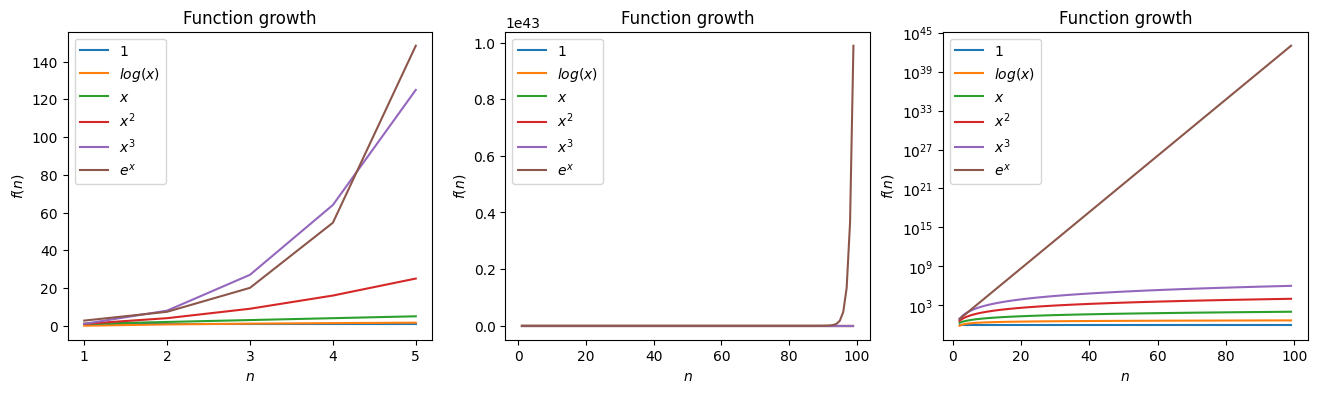

In [ ]:
fig = plt.figure(figsize=(16, 4))
fig.subplots(1, 3)

# Plot the functions over different x ranges
plt.subplot(1, 3, 1)
xs = range(1, 6)
plot_growth(xs, log_x=False)

plt.subplot(1, 3, 2)
xs = range(1, 100)
plot_growth(xs, log_x=False)

plt.subplot(1, 3, 3)
xs = range(2, 100)
plot_growth(xs, log_x=True)

Les dues primeres gràfiques mostren les sis funcions fent servir una escala lineal. Si mostrem únicament els valors per l'interval $[1, 6)$ (figura de l'esquerra), veiem com la funció exponencial és la que creix més ràpid a partir d'$x=5$, i podem comparar també els creixements de la resta de funcions. Si mostrem els valors a l'interval $[1, 100)$ amb una escala lineal (figura central), ja només som capaços de distingir el comportament de la funció exponencial i totes les altres funcions queden agrupades amb un creixement molt menor. Per últim, si mostrem les funcions en aquest mateix interval però fent servir una escala logarítmica per a l'eix y (figura de la dreta), podem apreciar novament el creixement de totes les funcions.

2. Calculeu la complexitat $\Theta$ dels algorismes que tenen els següents temps d'execució $t(n)$:

    1. $t(n)=5n^4 + n^3 + n + 4$
    2. $t(n)=n^3 + n^2$
    3. $t(n)=e^n + 2^n$
    4. $t(n)=e^n + n^3$
    5. $t(n)= n  + \log(n)$
    6. $t(n)=100^n + n!$

2. Respostes:

    1. $t(n)=5n^4 + n^3 + n + 4 \in \Theta(n^4)$
    2. $t(n)=n^3 + n^2 \in \Theta(n^3)$
    3. $t(n)=e^n + 2^n \in \Theta(e^n)$
    4. $t(n)=e^n + n^3 \in \Theta(e^n)$
    5. $t(n)= n  + \log(n) \in \Theta(n)$
    6. $t(n)=100^n + n! \in \Theta(n!)$


3. Digueu quines d'aquestes afirmacions són certes:

    1. $2n^2 + n \in \mathcal{O}(n)$
    2. $2n^2 + n \in \mathcal{O}(n^2)$
    3. $2n^2 + n \in \mathcal{O}(n^3)$
    4. $2n^2 + n \in \Theta(n)$
    5. $2n^2 + n \in \Theta(n^2)$
    6. $2n^2 + n \in \Theta(n^3)$
    7. $\log(n) + n^3  \in \mathcal{O}(n^2)$
    8. $\log(n) + n^3  \in \mathcal{O}(n^3)$
    9. $\log(n) + n^3  \in \mathcal{O}(n!)$



3. Respostes:

    1. Fals, ja que no hi ha cap parell de valors $c_2, n_0$ pels quals $2n^2+n \leq c_2n$ per tot $n \ge n_0$.
    2. Cert.
    3. Cert.
    4. Fals, ja que no hi ha cap parell de valors $c_2, n_0$ pels quals $2n^2+n \leq c_2n$ per tot $n \ge n_0$.
    5. Cert.
    6. Fals, ja que no hi ha cap parell de valors $c_1, n_0$ tals que $c_1n^3 \leq 2n^2+n$ per tot $n \ge n_0$.
    7. Fals, ja que no hi ha cap parell de valors $c_2, n_0$ pels quals $\log(n) + n^3 \leq c_2n^2$ per tot $n \ge n_0$.
    8. Cert.
    9. Cert.
    
    
4. Doneu el temps del cas millor ($t_b(n)$) i el temps del cas pitjor ($t_w(n)$) del següent algorisme. Per a cada cas, doneu també la seva complexitat temporal $\mathcal{O}$ i una instància del problema que tingui aquest temps d'execució.

In [ ]:
def linear_search(lst, element):
    """
    Return the index of the first appearance of 'element' in 'lst'
    or -1 if the 'element' is not in the 'lst'.
    """
    for i, e in enumerate(lst):
        if e == element:
            return i
    return -1

Resposta:

El temps del cas millor es dona quan l'element que cal buscar és el primer element de la llista. En aquest cas, el temps d'execució és $t_b(n)=3$ (dues assignacions, de les variables `i` i `e` i una comparació) i, per tant, la complexitat temporal és $\mathcal{O}(1)$. Una instància d'aquest cas podria ser per als valors d'entrada `[1, 2, 3, 4]` i `1`.

El temps del cas pitjor es dona quan l'element que cal buscar no és a la llista. En aquest cas, el temps d'execució és $t_w(n)=3n$ i, per tant, la complexitat temporal és $\mathcal{O}(n)$. Una instància d'aquest cas podria ser per als valors d'entrada `[1, 2, 3, 4]` i `5`.

5. Implementeu un algorisme amb complexitat $\mathcal{O}(n^3)$. Digueu (informalment) quin és el problema computacional que resol l'algorisme que proposeu i doneu dues instàncies d'exemple.

Resposta:

El següent algorisme resol el problema computacional de generar una llista de totes les paraules de tres lletres que es poden crear fent servir les lletres de la paraula `l1` en la primera posició, les lletres de la paraula `l2` en la segona posició, i les lletres de la paraula `l3` en la tercera posició.

Exemples d'instàncies d'aquest problema serien les entrades `"ABC"`, `"ABC"`, `"ABC"`, que generaria totes les paraules de tres lletres que es poden fer amb les lletres `A`, `B` i `C`; o bé `"ABC"`, `"_"`, `"123"`, que generaria totes les possibles paraules de tres lletres amb les lletres `A`, `B` o `C` en la primera posició, un guió a la segona posició, i els números `1`, `2` o `3` en la tercera posició.

In [ ]:
# Resposta


def three_letter_words(l1, l2, l3):
    r = []
    for let1 in l1:
        for let2 in l2:
            for let3 in l3:
                r.append(let1 + let2 + let3)
    return r

In [ ]:
l1, l2, l3 = "ABC", "ABC", "ABC"
print(three_letter_words(l1, l2, l3))

['AAA', 'AAB', 'AAC', 'ABA', 'ABB', 'ABC', 'ACA', 'ACB', 'ACC', 'BAA', 'BAB', 'BAC', 'BBA', 'BBB', 'BBC', 'BCA', 'BCB', 'BCC', 'CAA', 'CAB', 'CAC', 'CBA', 'CBB', 'CBC', 'CCA', 'CCB', 'CCC']


In [ ]:
l1, l2, l3 = "ABC", "_", "123"
three_letter_words(l1, l2, l3)

['A_1', 'A_2', 'A_3', 'B_1', 'B_2', 'B_3', 'C_1', 'C_2', 'C_3']

6. Indiqueu la complexitat $\mathcal{O}$ dels següents algorismes que resolen el mateix problema computacional. Digueu quin és el problema computacional que resolen i quin dels dos algorismes faríeu servir si haguéssiu de treballar amb problemes de mida gran.

In [ ]:
def max_element_alg1(list_1, list_2):
    max_element = list_1[0]
    for e in list_1 + list_2:
        if e > max_element:
            max_element = e
    return max_element


def max_element_alg2(list_1, list_2):
    max_element = list_1[0]
    for e1 in list_1:
        for e2 in list_2:
            aux = max(e1, e2)
            if aux > max_element:
                max_element = aux
    return max_element

Resposta:

Els dos algorismes resolen el problema computacional de trobar el valor màxim d'entre els valors de dues llistes. Formalment:

* Entrada: dues seqüències de valors numèrics, $\{e_0, e_1, \cdots, e_{m-1}\}$, $\{e_m, e_{m+1}, \cdots, e_{n-1}\}$
* Sortida: un únic valor numèric, $e_i$, tal que $e_i \ge e_j$ per qualsevol valor d'$i$ i $j \in [0, n)$.

El primer algorisme té una complexitat $\mathcal{O}(n)$, ja que té un únic bucle que recorre tots els elements d'entrada. El segon algorisme té una complexitat $\mathcal{O}(n^2)$, ja que té un bucle extern que recorre la primera llista i un bucle intern, dins del bucle extern, que recorre tots els elements de la segona llista.

Per tant, si haguéssim de treballar amb llistes grans, faríem servir el primer algorisme, ja que és més eficient (té una complexitat temporal menor).

7. El codi següent calcula quants números resultants de productes de dos números de 4 xifres són múltiples d'11. Optimitzeu el codi per tal de millorar-ne el seu temps d'execució. Penseu en millores tant des del punt de vista algorísmic com d'implementació.

Nota: reduïu el temps d'execució en, com a mínim, un ordre de magnitud.

In [ ]:
def prod_mult_11():
    result = []
    l1 = list(range(1000, 10000))
    l2 = list(range(1000, 10000))
    for i in l1:
        for j in l2:
            if i*j % 11 == 0:
                result.append(i*j)
    return len(result)

In [ ]:
prod_mult_11()

14071239

Resposta:

En primer lloc, observant l'algorisme podem veure com s'itera dues vegades per dues llistes de números de 4 xifres, es calcula el producte d'un valor de la primera llista per un valor de la segona, es comprova si aquest és múltiple d'11 i, si ho és, s'afegeix a la llista de resultats. Hi ha dues optimitzacions clares d'aquest algorisme, que provenen de les següents observacions:

* Per tal que el resultat sigui múltiple d'11, com a mínim un dels dos números que multipliquem cal que sigui múltiple d'11. Per tant, podríem crear una primera llista amb només els números de 4 xifres múltiples d'11, i una segona llista amb tots els números de 4 xifres. Així, ens evitem moltes iteracions (ja que la primera llista serà més petita) i, alhora, molts càlculs de divisibilitat. A més, els càlculs de divisibilitat passen a ser sobre números més petits (de 4 xifres en comptes de sobre el producte).
* Només volem saber el nombre de números que compleixen la condició de l'enunciat i no pas quins són aquests números. Per tant, en comptes de desar-los en una llista i després mirar quants elements té la llista, podem directament comptar quants números compleixen les condicions, tenint en compte l'observació anterior.

En segon lloc, fixant-nos en la implementació, veiem que hi ha també algunes ineficiències, com ara la conversió del `range` a una llista abans de fer-lo servir.

Observant el resultat d'`%lprun`, confirmem algunes de les nostres observacions:

In [ ]:
%lprun -f prod_mult_11 prod_mult_11()

Atenent al temps d'execució per execució (`Per Hit`), veiem com aquest és molt alt per a les dues assignacions de les llistes `l1` i `l2`. Mirant el percentatge de temps de la funció dedicat a cada línia, veiem com la línia que s'hi està més temps és la comprovació de la divisibilitat, seguida de prop pel bucle intern, ja que s'executen moltes vegades (81 milions de vegades!). Ambdues línies juntes utilitzen prop del 90 % del temps d'execució de la funció. El 10 % restant es troba dedicat, principalment, a afegir elements a la llista de resultat.

El codi següent millora el codi anterior aprofitant les observacions fetes tant des del punt de vista algorísmic com d'implementació:

In [ ]:
def prod_mult_11():
    nums_4_dig_mult_11 = len([e for e in range(1000, 10000)
                              if not e % 11])
    nums_4_dig = len(range(1000, 10000))
    return nums_4_dig_mult_11*nums_4_dig + \
        nums_4_dig_mult_11*(nums_4_dig-nums_4_dig_mult_11)

In [ ]:
prod_mult_11()

14071239

In [ ]:
%lprun -f prod_mult_11 prod_mult_11()

Efectivament, hem reduït el temps d'execució de gairebé un minut a menys d'una centèsima de segon, diversos ordres de magnitud respecte a la implementació inicial! Tot i així, la implementació encara es pot millorar més... us hi animeu?

# 5. Bibliografia


## 5.1. Bibliografia bàsica

La bibliografia bàsica d'aquesta unitat és el contingut explicat en el *notebook* (no és necessari consultar cap enllaç extern).


## 5.2. Bibliografia addicional (ampliació de coneixements)

En aquesta unitat ens hem centrat a avaluar la complexitat temporal dels algorismes, així com el temps d'execució de les implementacions. Ara bé, l'anàlisi d'algorismes i d'implementacions es pot estendre per cobrir altres tipus de recursos, com ara l'espai de memòria.

Podem analitzar la complexitat espacial dels nostres algorismes de manera anàloga a com ho hem fet amb el temps d'execució. Us recomanem pensar com faríeu aquesta anàlisi per als algorismes que hem presentat en aquesta unitat. Els articles següents us poden servir com a introducció per tal de reflexionar sobre com avaluar la complexitat espacial ([1](https://www.studytonight.com/data-structures/space-complexity-of-algorithms) i [2](https://courses.cs.northwestern.edu/311/html/space-complexity.html)).

Us recomanem llegir la documentació del *profiler* de memòria [`memory_profiler`](https://pypi.org/project/memory-profiler/) per descobrir com podem analitzar el consum de memòria dels programes fets amb Python.